# WeatherPy
----

#### OBSERVATIONS

-> Temperature increases the closer the city is to the equator.
-> Cloudiness lacks any clear correlation with the latitude of cities. 
-> In August, cities in >0' latitude tend to experience higher humidity (makes sense given opposing season schedule).

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

#lists needed: City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed

cityname = []
cloud = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

#loop
print("Beginning Data Retrieval")     
print("-----------------------------")
for city in cities:
    try:
        api_request = requests.get(query_url + city).json()
        cityname.append(api_request['name'])
        cloud.append(api_request['clouds']['all'])
        country.append(api_request['sys']['country'])
        date.append(api_request['dt'])
        humidity.append(api_request['main']['humidity'])
        lat.append(api_request['coord']['lat'])
        lng.append(api_request['coord']['lon'])
        maxtemp.append(api_request['main']['temp_max'])
        windspeed.append(api_request['wind']['speed'])
        print(f"Processing Record.... | {city}")
    except Exception:
        print("City not found. Skipping...")
    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")    

Beginning Data Retrieval
-----------------------------
Processing Record.... | san patricio
Processing Record.... | jamestown
Processing Record.... | qianguo
Processing Record.... | saint-pierre
Processing Record.... | hambantota
City not found. Skipping...
Processing Record.... | rikitea
Processing Record.... | kloulklubed
Processing Record.... | arraial do cabo
Processing Record.... | ust-tarka
Processing Record.... | bethel
Processing Record.... | saint-joseph
Processing Record.... | nakama
Processing Record.... | ribeira grande
Processing Record.... | zhigansk
Processing Record.... | upernavik
Processing Record.... | carnarvon
Processing Record.... | bredasdorp
Processing Record.... | hithadhoo
Processing Record.... | lebu
Processing Record.... | puerto leguizamo
Processing Record.... | hilo
Processing Record.... | kapit
Processing Record.... | alofi
Processing Record.... | puerto carreno
Processing Record.... | codrington
Processing Record.... | port alfred
Processing Record.... |

City not found. Skipping...
Processing Record.... | touros
Processing Record.... | new norfolk
Processing Record.... | miri
Processing Record.... | standerton
Processing Record.... | port hueneme
Processing Record.... | cadillac
Processing Record.... | jaguarao
Processing Record.... | cherskiy
Processing Record.... | tarata
Processing Record.... | klyuchi
Processing Record.... | namibe
Processing Record.... | thessalon
Processing Record.... | baba ana
Processing Record.... | zelenogorskiy
Processing Record.... | mnogovershinnyy
Processing Record.... | chapais
Processing Record.... | yellowknife
Processing Record.... | abu samrah
Processing Record.... | strangnas
Processing Record.... | lucea
Processing Record.... | ambilobe
Processing Record.... | tomatlan
Processing Record.... | ponta do sol
Processing Record.... | mulanje
Processing Record.... | salalah
Processing Record.... | berlevag
Processing Record.... | port moresby
Processing Record.... | namatanai
Processing Record.... | pang

Processing Record.... | puerto el triunfo
Processing Record.... | malindi
City not found. Skipping...
Processing Record.... | hede
Processing Record.... | dingle
Processing Record.... | coihaique
City not found. Skipping...
Processing Record.... | la presa
Processing Record.... | conceicao do mato dentro
Processing Record.... | anadyr
Processing Record.... | mangrol
Processing Record.... | hamilton
Processing Record.... | marsa matruh
Processing Record.... | joshimath
Processing Record.... | mwanza
Processing Record.... | san antonio
Processing Record.... | kropotkin
Processing Record.... | shenjiamen
Processing Record.... | dalnerechensk
Processing Record.... | turukhansk
Processing Record.... | san vicente
Processing Record.... | riyadh
Processing Record.... | chincha alta
Processing Record.... | alice springs
Processing Record.... | marathon
Processing Record.... | brae
Processing Record.... | safranbolu
Processing Record.... | thayetmyo
Processing Record.... | akita
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
weather_dict = {
    "City":cityname,
    "Cloudiness":cloud,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":maxtemp,
    "Wind Speed":windspeed
}

weather_df= pd.DataFrame(weather_dict)
weather_df.count()

#export csv
weather_df.to_csv("weather_df.csv")

In [43]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,San Patricio,38,PY,1566779168,56,-26.98,-56.83,70.28,7.85
1,Jamestown,0,AU,1566779166,65,-33.21,138.60,48.32,3.91
2,Qianguo,100,CN,1566779343,83,45.12,124.86,68.84,11.83
3,Saint-Pierre,0,FR,1566779343,68,48.95,4.24,66.20,4.70
4,Hambantota,90,LK,1566779212,100,6.12,81.12,75.20,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

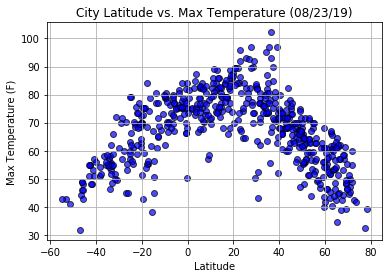

In [44]:
#create scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="blue",alpha=0.7)
plt.title("City Latitude vs. Max Temperature (08/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("Images/latvtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

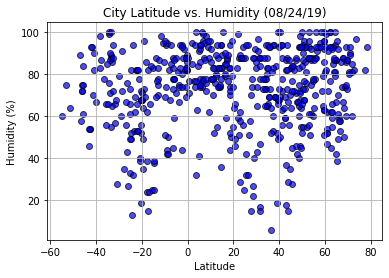

In [46]:
# Build scatterplot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors="black",facecolors="blue",alpha=0.7)

plt.title("City Latitude vs. Humidity (08/24/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/latvhumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

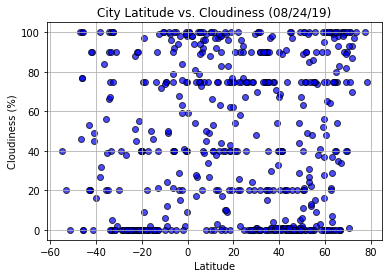

In [47]:
# Build scatterplot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors="black",facecolors="blue",alpha=0.7)

plt.title("City Latitude vs. Cloudiness (08/24/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/latvcloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

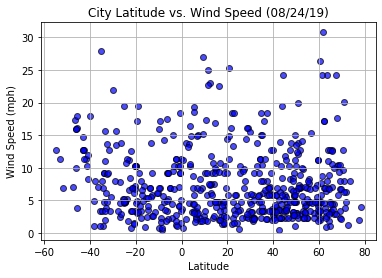

In [48]:
# Build scatterplot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors="black",facecolors="blue",alpha=0.7)

plt.title("City Latitude vs. Wind Speed (08/24/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/latvwind.png")

# Show plot
plt.show()